In [15]:
import requests
from PIL import Image

In [16]:
subscription_key = '15fd3b5ae5f040f79640b80d8655b02d'

In [17]:
#キーが正しいかどうか判別する
assert subscription_key

In [18]:
face_api_url = "https://20210526-kuzumi.cognitiveservices.azure.com/face/v1.0/detect"

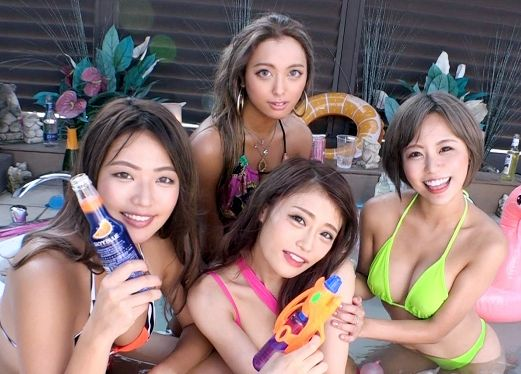

In [85]:
img = Image.open('sample01.jpg')
img

In [86]:
#画像をバイナリデータに変更する
with open ('sample01.jpg', 'rb') as f:
    binary_img = f.read()

In [87]:
headers = {
    #画像をURLからでなく直接指定する
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion'
}

res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img )

In [88]:
res

<Response [200]>

In [89]:
result = res.json()
result

[{'faceId': 'b1924c7c-92fd-464e-9e52-731f690d90bd',
  'faceRectangle': {'top': 153, 'left': 99, 'width': 85, 'height': 85},
  'faceAttributes': {'smile': 1.0,
   'headPose': {'pitch': -8.2, 'roll': 5.9, 'yaw': 6.3},
   'gender': 'female',
   'age': 23.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0},
   'makeup': {'eyeMakeup': True, 'lipMakeup': True},
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.05,
    'invisible': False,
    'hairColor': [{'color': 'brown', 'confidence': 1.0},
     {'color': 'black', 'confidence': 0.86},
     {'color': 'red', 'confidence': 0.18},
     {'color': 'gray', 'confidence': 0.14},
     {'color': 'blond', 'confidence': 0.1},
     {'color': 'other', 'confidence': 0.04}

In [90]:
rect = result[0]['faceRectangle']
rect

{'top': 153, 'left': 99, 'width': 85, 'height': 85}

In [91]:
from PIL import ImageDraw

In [92]:
draw = ImageDraw.Draw(img)

In [59]:
#draw.line([(0,50), (200,50), (0,150), (200,150)], fill='red', width=5)
#img

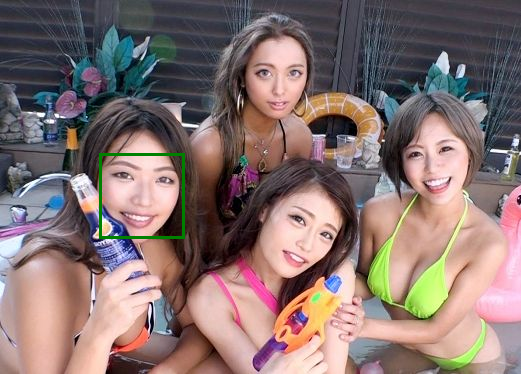

In [93]:
#四角形は左上と右下の座標を入力すれば作成できる
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=3)
img

In [1]:
import requests
from PIL import Image
from PIL import ImageDraw
import io

subscription_key = '15fd3b5ae5f040f79640b80d8655b02d'
assert subscription_key
face_api_url = "https://20210526-kuzumi.cognitiveservices.azure.com/face/v1.0/detect"

img = Image.open('sample02.jpg')
with io BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #バイナリ取得

headers = {
    #画像をURLからでなく直接指定する
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img )

results = res.json()
for result in results:
    rect = result['faceRectangle']
      
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=2)
    

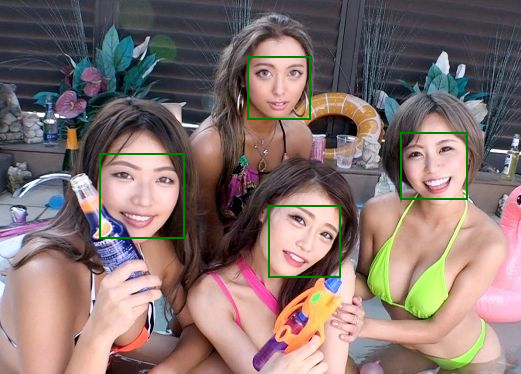

In [2]:
img